# Parker Christenson Assignment 2

#### Spliting and training off of whatever data we would like to use, then we are going to train a model to see how much better it improves, we are going to be usign a basic decision tree

There will be some EDA just to figure out what we are trying to predict, what features work the best, and how many other things we can do with the pre-determined data. I will give some explination on why I do somethings throughout the assignment. 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import xgboost as xgb

In [69]:
# load the data 
df = pd.read_csv('data.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### This data set is looking at if the chance of admit, which will be our target variable 

In [70]:
# doing a basic correlation matrix using seaborn to see if there are any strong correlations for feature extraction 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### So looking at this correlation matrix, we can see that the chance of admit is highly correlated with the `GRE` score, and the `TOEFL` score. This is good to know because we can use these two features to predict the chance of admit, which we can make a ratio out of. Next we can also see the `CGPA` is also highly correlated with the chance of admit, but the reaseach has very litte correlation with the chance of admit.

In [71]:
# doing our training and testing splits for the data making a baseline model  

y = df['Chance of Admit ']
x = df.drop(columns=['Chance of Admit '], axis=1)

In [72]:
# making just a baseline model to see how well it does compared to the feature engineered model
baseline_model = xgb.XGBRegressor( random_state=42)

# making a baseline test and train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [73]:
# train the model and get the training score and the test score
baseline_model.fit(x_train, y_train)
train_score = baseline_model.score(x_train, y_train)
test_score = baseline_model.score(x_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

Training Score: 0.9998932123450855
Test Score: 0.833374891398889


### Now we are going to do some feature engineering on the dataset, and we will add about 1-2 columns, re-asses, then add more. 

In [74]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [75]:
# dividing the gre score and the toefl score and naming it the gre_toefl_ratio
df['gre_toefl_ratio'] = df['GRE Score'] / df['TOEFL Score']

# dividing the sop score and the university rating and naming it the sop_university_ratio
df['sop_university_ratio'] = df[' SOP'] / df['University Rating']

df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,gre_toefl_ratio,sop_university_ratio
0,1,337,118,4,4.5,4.5,9.65,1,0.92,2.855932,1.125000
1,2,324,107,4,4.0,4.5,8.87,1,0.76,3.028037,1.000000
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3.038462,1.000000
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2.927273,1.166667
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3.048544,1.000000


### `Why did I pick these two columns to add? `

I picked these four columns did have very high correlation with the target variable in the correlation matrix, so I thought that they would be good to add to the dataset. That being said, I allways look at the correlation matrix to see what I should add to the dataset, and if there is some kind of further information that you could pull from the data, like a date column, or some kind of ratio that could be made. I think that the best route for this is to have a good Idea of what typically correlates. For example, if you are looking at a car crash data set, then you very well could likely pull from the datetime column, to see when the highest amount of crashes happened, and if they were on a weekend or a weekday, during rush hour or not. This data set is very limited, and I typically work with 20+ column data sets, so this is a little bit of a challenge for me to make a model that I can improve on. 

In [76]:
# now we are going to do a new split, this time with the new features we created to see if it improves the model
y_new = df['Chance of Admit ']
x_new = df.drop(columns=['Chance of Admit '], axis=1)


# making a new split with the new features
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# xgb model_two_features
xgb_model_two_features = xgb.XGBRegressor(max_depth=3, random_state=24)

# Now we are going to train the model and get the accuracy score
xgb_model_two_features.fit(x_train_new, y_train_new)
train_score_new = xgb_model_two_features.score(x_train_new, y_train_new)
test_score_new = xgb_model_two_features.score(x_test_new, y_test_new)

# printing scores
print(f"Training Score with new features: {train_score_new}")
print(f"Test Score with new features: {test_score_new}")

Training Score with new features: 0.9919405092011981
Test Score with new features: 0.8470092726302779


In [77]:
# doing some cross eval 
cv_scores = cross_val_score(xgb_model_two_features, x_new, y_new, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.64642357 0.7143818  0.82084839 0.79550103 0.78137772]
Mean cross-validation score: 0.7517065040444999


### `So I have a reason to belive that the models are over fitting with the training data and is not be generalized well enough to the testing data. I am going to check that out with two qucick graphs`

<module 'matplotlib.pyplot' from 'c:\\Users\\tehwh\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

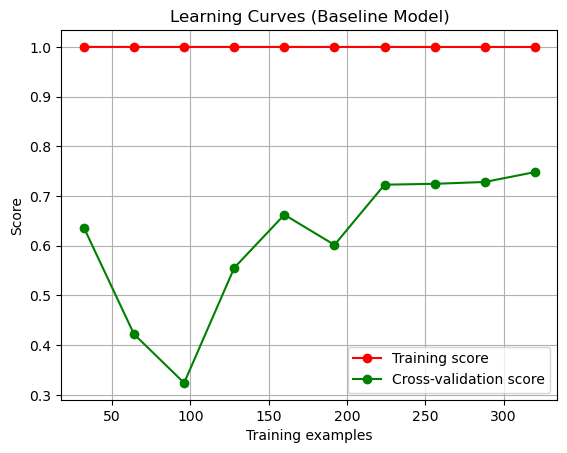

In [78]:
# making a function to plot these scores
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2',
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# plotting the baseline model..
plot_learning_curve(baseline_model, x, y, "Learning Curves (Baseline Model)")

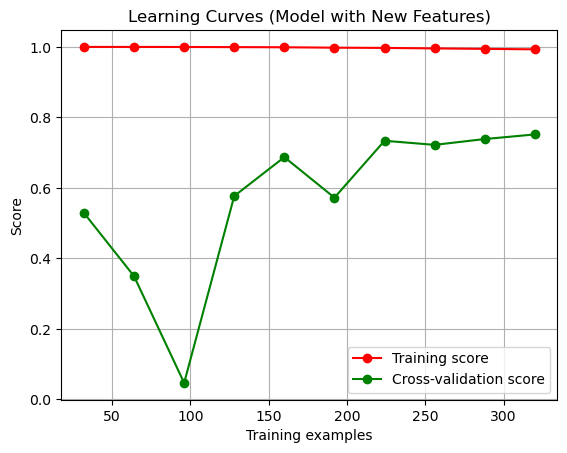

In [79]:
# plotting the two new features model
plot_learning_curve(xgb_model_two_features, x_new, y_new, "Learning Curves (Model with New Features)")
plt.show()

So looking at the two charts we are able to see that the training scores are in fact very high, but the cross validation scores are not as high. This is a clear sign that the model is overfitting the data and is not able to generalize well enough to the testing data. That being said, the model needs to be feed a wider verity of data to be able to generalize better. We very well could bootstrap the data, and the model could be able to generalize better, but I am not going to go that far with this data set.


## Bootstrapping the data set so we can re-run tests and then doing one more feature extraction on the data 

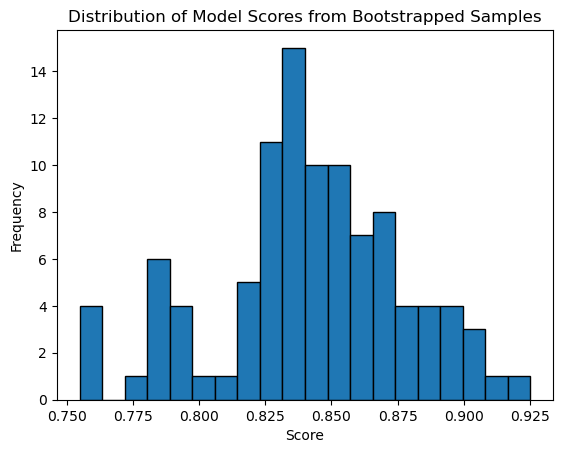

mean score: 0.8419732467009478
standard deviation : 0.036069227555198854


In [80]:
from sklearn.utils import resample

# reloading the data into new df 
df_reload = pd.read_csv('data.csv')

# feature engineer
df_reload['gre_toefl_ratio'] = df_reload['GRE Score'] / df_reload['TOEFL Score']
df_reload['sop_university_ratio'] = df_reload[' SOP'] / df_reload['University Rating']
y = df_reload['Chance of Admit ']
x = df_reload.drop(columns=['Chance of Admit '], axis=1)

# Function to perform bootstrapping
def bootstrap_model(data, target, n_iterations=100, test_size=0.2):
    models = []
    scores = []
    
    for i in range(n_iterations):
        # Bootstrap resample
        x_resampled, y_resampled = resample(data, target)
        x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=test_size, random_state=42)
        model = xgb.XGBRegressor(max_depth=3, random_state=24, reg_alpha=1, reg_lambda=1, n_estimators=100)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        models.append(model)
        scores.append(score)
    return models, scores

# bootstraping 
models, scores = bootstrap_model(x, y, n_iterations=100)

# plotting 
plt.hist(scores, bins=20, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Model Scores from Bootstrapped Samples')
plt.show()

# mean and std diviation
print(f'mean score: {np.mean(scores)}')
print(f'standard deviation : {np.std(scores)}')

## `Analyzing this even further`

So what this chart is showing is that the data that we are feeding it is essentially generalizing the model to well to the training data. With that being said, I looped the models to create this chart which shows the avg distribution of the training and testing data. This is a good way to see if the model is overfitting the data, and if it is not able to generalize well enough to the testing data, and with that being said the avg score was 84.20%. That means the model is still getting really high training scores. There is a cluster of the lower scores being at around 75%. With the models standard deviation being at 3.6%. That means even over all of the loops of the model we just diid, it was still changing very slightly. 